***https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho***

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
for column in df.columns:
    print(column)

Car_Name
Year
Selling_Price
Present_Price
Kms_Driven
Fuel_Type
Seller_Type
Transmission
Owner


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


**Добавим колонку - Currenty_Year. Вычтим из нее колонку ***Year*** и получим количество лет**

In [9]:
df['Currenty_Year'] = 2023
df['Car_age'] = df['Currenty_Year'] - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Currenty_Year,Car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [10]:
df = df.drop(['Currenty_Year'], axis=1)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


**One-hot encoding**

In [11]:
print(f'Fuel type unique value:{df.Fuel_Type.unique()}')
print(f'Seller type unique value:{df.Seller_Type.unique()}')
print(f'Transmission unique value:{df.Transmission.unique()}')

Fuel type unique value:['Petrol' 'Diesel' 'CNG']
Seller type unique value:['Dealer' 'Individual']
Transmission unique value:['Manual' 'Automatic']


In [12]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True, dtype=int)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,9,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,10,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,6,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,12,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,9,1,0,0,1


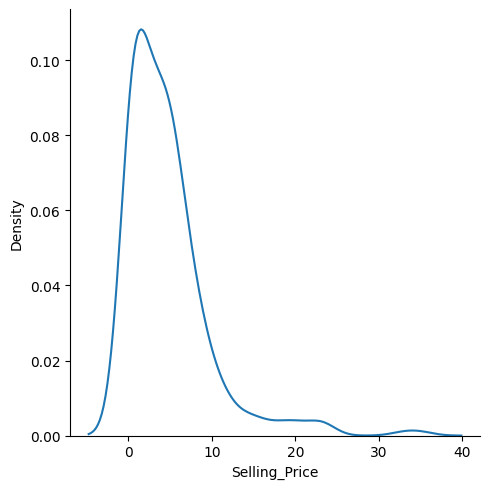

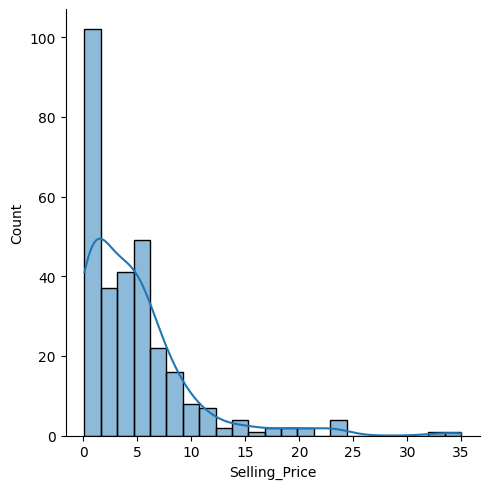

In [13]:
sns.displot(data=df, x='Selling_Price', kind='kde')
sns.displot(data=df, x='Selling_Price', kde=True)

In [14]:
df1 = pd.read_csv('car data.csv')
df1 = df1.drop('Car_Name', axis=1)

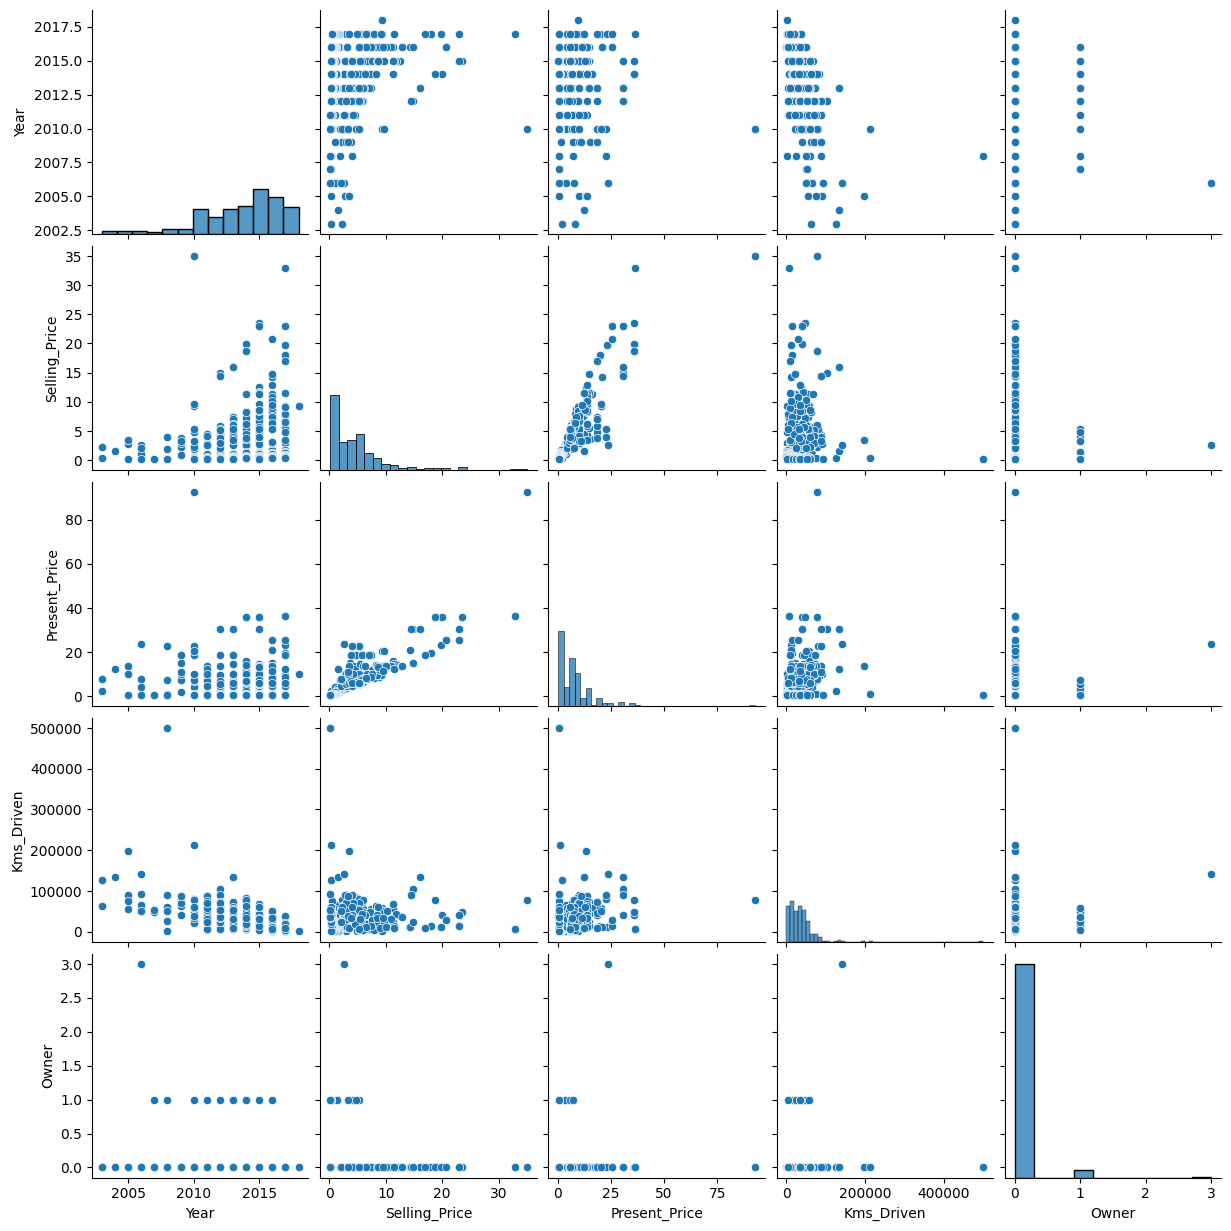

In [15]:
sns.pairplot(df1[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']])

<Axes: >

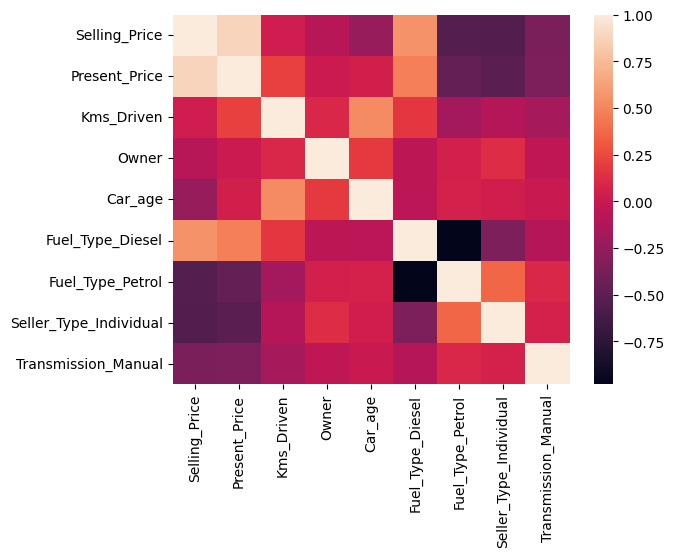

In [16]:
sns.heatmap(df.drop(['Year', 'Car_Name'],axis=1).corr())

In [17]:
final_df = df.drop(['Year', 'Car_Name'], axis=1)

In [18]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [20]:
X = final_df.drop('Selling_Price', axis=1)
y = final_df['Selling_Price']

**Разбиваем на train и test**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.head()

,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
184,0.750,26000,1,15,0,1,1,1
132,0.950,3500,0,6,0,1,1,1
194,0.787,50000,0,15,0,1,1,1
75,6.800,36000,0,8,0,1,0,1
111,1.500,8700,0,7,0,1,1,1


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)
y_pred_actual = model.predict(X_train)

In [25]:
predictions = pd.DataFrame({'Actuals':y_test, 'predictions':y_pred, 'ytest - ypred': y_test - y_pred})

In [26]:
predictions.sample(5)

,Actuals,predictions,ytest - ypred
42,1.95,2.290980,-0.340980
275,10.90,9.696213,1.203787
296,9.50,8.973776,0.526224
104,1.35,2.178890,-0.828890
77,1.50,4.271332,-2.771332


In [27]:
Coef_summary = pd.DataFrame(data = X_train.columns, columns=['Features'])
Coef_summary ['Coefficients'] = np.round(model.coef_,4)
Coef_summary

,Features,Coefficients
0,Present_Price,0.4292
1,Kms_Driven,-0.0000
2,Owner,-0.9038
3,Car_age,-0.3538
4,Fuel_Type_Diesel,2.5333
5,Fuel_Type_Petrol,0.7385
6,Seller_Type_Individual,-1.1906
7,Transmission_Manual,-1.6390


In [28]:
print("Mean Absolute Error : " ,metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : " ,np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score: " ,metrics.r2_score(y_test,y_pred))

Mean Absolute Error :  1.2162256821297008
Mean Squared Error :  3.478803970637872
Root Mean Squared Error :  1.865155213551374
R2 Score:  0.8489813024899079


In [29]:
print ('Mean Absolute Error for Train:' , metrics.mean_absolute_error(y_train, y_pred_actual))
print ('Mean Squared Error for Train:' ,  metrics.mean_squared_error(y_train,y_pred_actual))
print ('Root Mean Squared Error for Train:' ,  np.sqrt(metrics.mean_squared_error(y_train,y_pred_actual)))
print ('R2 Score for Train:' ,  metrics.r2_score(y_train,y_pred_actual))

Mean Absolute Error for Train: 1.1675804448351728
Mean Squared Error for Train: 2.9437205399630035
Root Mean Squared Error for Train: 1.7157274084081666
R2 Score for Train: 0.8886517300804564


In [30]:
import matplotlib.pyplot as plt

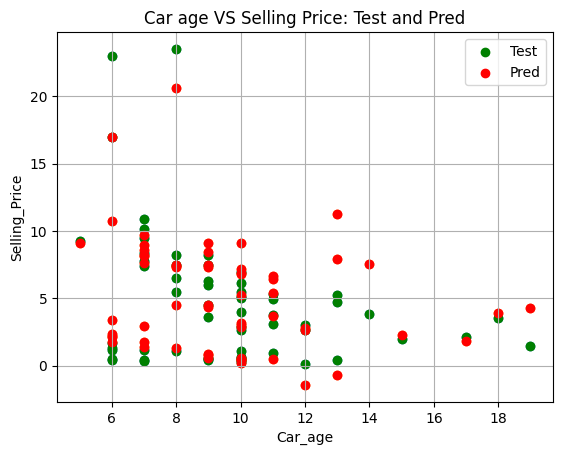

In [31]:
plt.scatter(X_test['Car_age'], y_test)
plt.scatter(X_test['Car_age'], y_pred)

plt.title('Car age VS Selling Price: Test and Pred')
plt.xlabel('Car_age')
plt.ylabel('Selling_Price')
plt.legend(handles= [plt.scatter(X_test['Car_age'], y_test, color='g'), plt.scatter(X_test['Car_age'], y_pred, color='r')], 
           labels = ['Test', 'Pred'])

plt.grid()
plt.show()

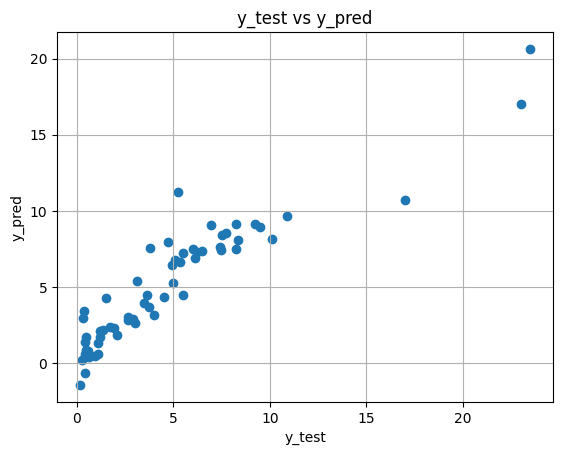

In [32]:
plt.scatter(y_test, y_pred)

plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')

plt.grid()
plt.show()